# Lesson 14 - Solutions
These exercises are to help you check your understanding during class. They will not be collected.

## Part 1 - Analysing Accuracy

### Exercise 1 - Count the accuracy types
- Execute the code from in the cell be low to load the cancer data set, split the data and predict the class of the observations in the `test`  data frame.
- Find the number of predictions with each of the four accuracy types: true positive, true negative, false positive, false negative. Store these values in variables with descriptive names. 

In [2]:
# Code from lesson 13
# 'cancerous' was replaced with 'cancer'
library(dplyr)
cancer <- read.csv('~/shared/data/cancer.csv')
cancer <- mutate(cancer, Class = factor(
                                    Class, 
                                    levels = c(0,1), 
                                    labels = c('benign', 'cancer')
                                    )
                 )

training <- cancer[1:400,]
test <- cancer[401:nrow(cancer),]

# a is the marginal adhesion
# t is the thickness
classifier <- function (a, t){
    if(a>4){
        Class <- 'cancer' 
    } else if (t > 6){
        Class <- 'cancer'
    } else {
        Class <- 'benign'
    }
    Class
}
classifier <- Vectorize(classifier)

test <- mutate(test, Prediction = classifier(Marginal.Adhesion, 
                                            Clump.Thickness
                                            )
              )
test <- select(test, 
               Marginal.Adhesion, 
               Clump.Thickness, 
               Prediction, 
               Class
              )
head(test,3)

,Marginal.Adhesion,Clump.Thickness,Prediction,Class
,<int>,<int>,<chr>,<fct>
401,6,3,cancer,benign
402,5,8,cancer,cancer
403,1,1,benign,benign


In [3]:
# Strategy 1 Summary Table (Lesson 13)

# c is the class
# p is the prediction
accuracy_type <- function(c,p){
    if (c == p){
        tf <- 'true'
    } else {
        tf <- 'false'
    }
    
    if (p == 'cancer'){
        pn <-'positive'
    } else {
        pn <- 'negative'
    }
    paste(tf,pn)
}
accuracy_type <- Vectorize(accuracy_type)

test <- mutate(test, Accuracy = accuracy_type(Class, Prediction))
types <- summarize(group_by(test, Accuracy), Count = n())
types

### Use [[1]] to extract value from 1x1 data frame.
fn <- types[1,2][[1]] ## false negative
fp <- types[2,2][[1]] ## false positive
tn <- types[3,2][[1]] ## true negative
tp <- types[4,2][[1]] ## true posive

fn
fp
tn
tp

Accuracy,Count
false negative,7
false positive,6
true negative,210
true positive,60


[1] 7

[1] 6

[1] 210

[1] 60

In [4]:
types[1,2]

Count
7


In [5]:
# Strategy 2 Boolean expressions
class <- test$Class
prediction <- test$Prediction

## false negative
fn <- sum(class != prediction & prediction == 'benign')
## false positive
fp <- sum(class != prediction & prediction == 'cancer')
## true negative
tn <- sum(class == prediction & prediction == 'benign')
## true posive
tp <- sum(class == prediction & prediction == 'cancer') 

fn
fp
tn
tp

[1] 7

[1] 6

[1] 210

[1] 60

### Exercise 2 - Accuracy and Precision
Find the accuracy and precision of the predictions made in Exercise 1.
$$\text{Accuracy} = \frac{\text{# correct predictions}}{\text{# of observations}}$$

In [15]:
# Accuracy 
# Strategy 1: Only accuracy types
(tp + tn) / (tp + tn + fp + fn)

[1] 0.9540636

In [16]:
# Accuracy 
# Strategy 2: Find numerator and denominator then divide
correct <- sum(test$Class == test$Prediction)
count <- nrow(test)

correct / count

[1] 0.9540636

$$\text{Precision} = \frac{\text{# true positive predictions}}{\text{# of positive predictions}}$$

In [19]:
# Precision
# Strategy 1: Only accuracy types
tp / (tp + fp)

[1] 0.9090909

In [17]:
# Precision
# Strategy 2: Find numerator and denominator then divide
pos_predictions <- sum(test$Prediction == 'cancer')

tp / pos_predictions

[1] 0.9090909

### Exercise 3 - True positive / negative rate
Find the true positive rate and true negative rate of the predictions made in Exercise 1.
$$\text{True positive rate} = \frac{\text{# true positive predictions}}{\text{# positive cases}}$$

In [23]:
# True positive rate
# Strategy 1: Only accuracy types
tp / (tp + fn)

[1] 0.8955224

In [22]:
# True positive rate
# Strategy 2: Find numerator and denominator then divide
pos_cases <- sum(test$Class == 'cancer')

tp / pos_cases

[1] 0.8955224

$$\text{True negative rate}  = \frac{\text{# true negative predictions}}{\text{# negative cases}}$$

In [21]:
# True negative rate
# Strategy 1: Only accuracy types
tn / (tn + fp)

[1] 0.9722222

In [20]:
# True negative rate
# Strategy 2: Find numerator and denominator then divide
neg_cases <- sum(test$Class == 'benign')

tn / neg_cases

[1] 0.9722222

## Part 2 - Manipulating Columns

### Exercise 4 - Old Faithful
- Re-familiarize yourself with the `faithful` data set by looking at its documentation.
- Compute and estimate of the total time that Old Faithful was observed to collect this data. Is this an over estimate or an underestimate?
- Assume that the eruption are listed in chronological order and that the first observation session lasted four hours. How many eruptions were recorded in this hypothetical observation session?

In [ ]:
?faithful

In [29]:
faithful <- mutate(faithful, Obs_Time = eruptions + waiting)

sum(faithful$Obs_Time)

[1] 20232.68

Old faithful was observed for around 20233 minutes. This is an **under estimate**, because it doesn't account for the time spent waiting for the first eruption in each observation session. 

In [31]:
# Create a column with a running total of the time spent observing. 
faithful <- mutate(faithful, Total_Time = cumsum(Obs_Time))

In [32]:
# Strategy 1: Filter and count
nrow(filter(faithful, Total_Time <= 4*60))

[1] 3

In [33]:
# Strategy 2: Use Boolean expression
sum(faithful$Total_Time <= 4*60)

[1] 3

If the eruptions are listed in chronological order and the first observation session was four hours, then **three eruptions** were recorded in the first observation session. 

## Examples from notes

In [39]:
library(dplyr)
library(ggplot2)

### Example 1 - Accuracy counts

In [42]:
test_data <- data.frame(Class  = c(1,1,0,1,0,0), Prediction = c(0,1,1,1,1,0))
test_data <- mutate(test_data, 
                   Class = factor(Class, levels = c(0,1), labels = c('benign','cancer')),
                   Prediction = factor(Prediction, levels = c(0,1), labels = c('benign','cancer'))
                   )
test_data

Class,Prediction
cancer,benign
cancer,cancer
benign,cancer
cancer,cancer
benign,cancer
benign,benign


In [43]:
sum(test_data$Class == test_data$Prediction &
    test_data$Prediction == 'cancer')

[1] 2

### Example 2 - Measure Prediction efficiency

In [37]:
# Generate 500 random points
random_points <- data.frame(
    'x_coord' = round(runif(500, 0, 10),2),
    'y_coord' = round(runif(500, 0, 2.5),2)
)
random_points <- mutate(random_points, 
                        is_special = ((runif(500,0,100)<=6) + 
                                      ((x_coord > 6)|(runif(500,0,100)<=6))) %% 2)

head(random_points)

x_coord,y_coord,is_special
9.07,1.56,1
7.60,1.35,1
6.14,2.21,0
6.01,1.81,1
6.95,0.38,0
5.66,2.32,1


In [133]:
### NEW ###
# Make is_special column more readable
random_points <- mutate(random_points, 
                        is_special =  factor(
                            is_special,
                            levels = c(0,1),
                            labels = c("No", "Yes")
                        )
                       )
head(random_points)

x_coord,y_coord,is_special
2.91,0.65,No
1.96,0.18,No
7.85,1.95,Yes
8.50,2.09,Yes
7.95,0.68,Yes
7.18,0.28,Yes


In [134]:
# Split data into training data and test data
training <- random_points[1:300,]
test <- random_points[301:nrow(random_points),]

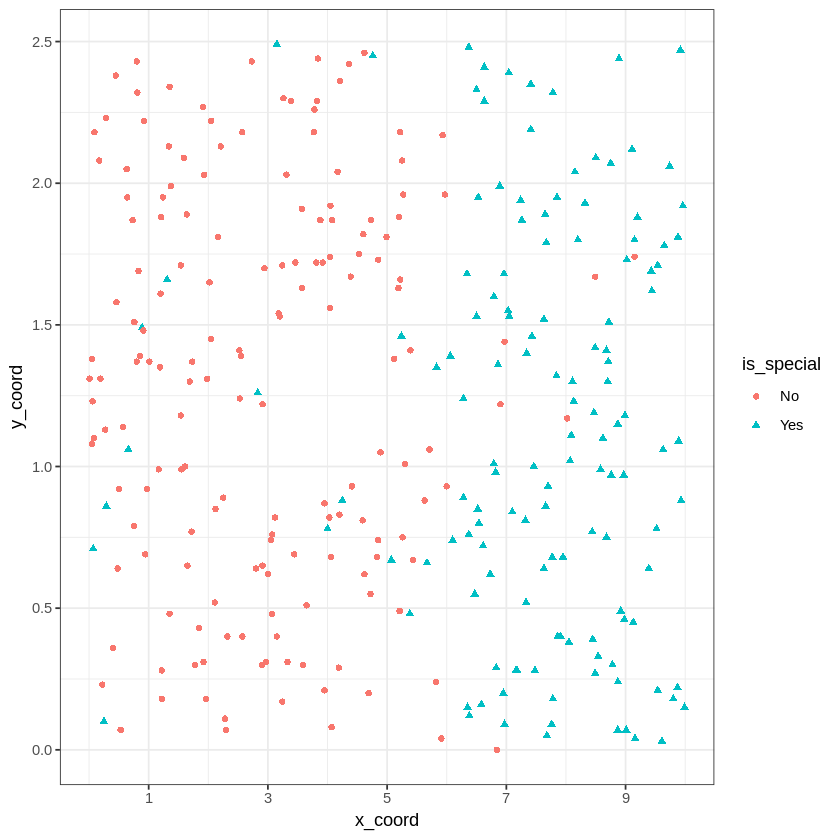

In [135]:
# plot training data
ggplot(training, aes(x=x_coord, y=y_coord, color = is_special, shape=is_special)) + 
    geom_point() +
    scale_x_continuous(breaks = seq(1,10,2)) +
    theme_bw()

In [136]:
# Create classifier function and use it to make predictions 
# about the traing data
points_classifier <- function(x,y){
    if(x>6) {
        'Yes'
    } else {
        'No'
    }
}
points_classifier <- Vectorize(points_classifier)

test <- mutate(test, prediction = points_classifier(x_coord, y_coord))

In [137]:
# s is the value of is_special
# p is the prediction
points_accuracy <- function(s,p){
    if(s == p) {
        if(s == 'Yes'){
            'True positive'
        } else {
            'True negative'
        }
    } else if (p=='Yes') {
        'false positive'
    } else {
        'false negative'
    }
}
points_accuracy <- Vectorize(points_accuracy)

test <- mutate(test, accuracy = points_accuracy(is_special, prediction))
accuracy_count <- summarize(group_by(test, accuracy), Count = n())
accuracy_count

accuracy,Count
false negative,13
false positive,6
True negative,102
True positive,79


In [139]:
# [[1]] extracts the actual number from the 1x1 dataframe. 
false_neg <- accuracy_count[1,2][[1]]
false_pos <- accuracy_count[2,2][[1]]
true_neg <- accuracy_count[3,2][[1]]
true_pos <- accuracy_count[4,2][[1]]

false_neg
false_pos
true_neg
true_pos

[1] 13

[1] 6

[1] 102

[1] 79

In [141]:
correct_count <- true_neg + true_pos
obs_count <- nrow(test)
pos_predictions <- true_pos + false_pos
neg_predictions <- true_neg + false_neg
pos_cases <- true_pos + false_neg
neg_cases <- true_neg + false_pos

# obs_count
# correct_count 
# pos_predictions 
# neg_predictions
# pos_cases
# neg_cases

$$\text{Accuracy} = \frac{\text{# correct predictions}}{\text{# of observations}}$$

In [142]:
# accuracy
correct_count / obs_count

[1] 0.905

$$\text{Precision} = \frac{\text{# true positive predictions}}{\text{# of positive predictions}}$$

In [143]:
# precision
true_pos / pos_predictions
                    

[1] 0.9294118

$$\text{True positive rate} = \frac{\text{# true positive predictions}}{\text{# positive cases}}$$

In [144]:
# True positive rate
true_pos / pos_cases

[1] 0.8586957

$$\text{True negative rate}  = \frac{\text{# true negative predictions}}{\text{# negative cases}}$$

In [145]:
# True negative rate
true_neg / neg_cases

[1] 0.9444444